# 수급 동향 및 수도권 비수도권 평균 매매가 그래프 비교하기

## 각 데이터 가져오기

### db 접근

### 테이블 가져오기

- APARTMENT_AVG_PRICE_CATEGORY_MONTHLY : 수도권, 지방권 평균 매매가

- SUPPLY_TRENDS_BY_CATEGORY : 수도권, 지방권 수급 동향

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import koreanize_matplotlib

# 월별 수도권 지방권 아파트 평균 매매 가격 테이블
sql_query_category = """
SELECT * FROM APARTMENT_AVG_PRICE_CATEGORY_MONTHLY;
"""

# 월별 수도권 지방권 수급동향 테이블
sql_query_supply = """
SELECT * FROM SUPPLY_TRENDS_BY_CATEGORY;
"""

### APARTMENT_AVG_PRICE_CATEGORY_MONTHLY 데이터 프레임

In [8]:
cur.execute(sql_query_category)
result_category = cur.fetchall()

category_df = pd.DataFrame(result_category)
category_df.columns = [desc[0] for desc in cur.description]

category_df.head(10)

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000
5,2014,6,수도권,338393000
6,2014,7,수도권,338403000
7,2014,8,수도권,338864000
8,2014,9,수도권,340449000
9,2014,10,수도권,341834000


### 수도권, 비수도권 테이블로 나누기

In [11]:
capital_df = category_df.loc[category_df['CATEGORY'] == '수도권'].reset_index(drop=True)
non_capital_df = category_df.loc[category_df['CATEGORY'] == '지방권'].reset_index(drop=True)

In [12]:
capital_df

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000
...,...,...,...,...
123,2024,4,수도권,664664000
124,2024,5,수도권,665731000
125,2024,6,수도권,669144000
126,2024,7,수도권,676207000


In [13]:
non_capital_df

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,지방권,168065000
1,2014,2,지방권,168487000
2,2014,3,지방권,168846000
3,2014,4,지방권,169182000
4,2014,5,지방권,169429000
...,...,...,...,...
123,2024,4,지방권,256520000
124,2024,5,지방권,256231000
125,2024,6,지방권,255802000
126,2024,7,지방권,255450000


### SUPPLY_TRENDS_BY_CATEGORY 데이터 프레임

In [9]:
cur.execute(sql_query_supply)
result_supply = cur.fetchall()

supply_df = pd.DataFrame(result_supply)
supply_df.columns = [desc[0] for desc in cur.description]

supply_df.head(10)

,YEAR,MONTH,CATEGORY,SUPPLY_INDEX
0,2014,1,수도권,89
1,2014,2,수도권,91
2,2014,3,수도권,93
3,2014,4,수도권,90
4,2014,5,수도권,90
5,2014,6,수도권,91
6,2014,7,수도권,92
7,2014,8,수도권,94
8,2014,9,수도권,99
9,2014,10,수도권,100


### 수도권, 비수도권 테이블로 나누기

In [15]:
capital_supply_df = supply_df.loc[supply_df['CATEGORY'] == '수도권'].reset_index(drop=True)
non_capital_supply_df = supply_df.loc[supply_df['CATEGORY'] == '지방권'].reset_index(drop=True)

In [16]:
capital_supply_df

,YEAR,MONTH,CATEGORY,SUPPLY_INDEX
0,2014,1,수도권,89
1,2014,2,수도권,91
2,2014,3,수도권,93
3,2014,4,수도권,90
4,2014,5,수도권,90
...,...,...,...,...
123,2024,4,수도권,90
124,2024,5,수도권,92
125,2024,6,수도권,95
126,2024,7,수도권,98


In [17]:
non_capital_supply_df

,YEAR,MONTH,CATEGORY,SUPPLY_INDEX
0,2014,1,지방권,101
1,2014,2,지방권,102
2,2014,3,지방권,102
3,2014,4,지방권,101
4,2014,5,지방권,100
...,...,...,...,...
123,2024,4,지방권,88
124,2024,5,지방권,89
125,2024,6,지방권,88
126,2024,7,지방권,90


## 수도권과 지방권 집값 평균 비교하기

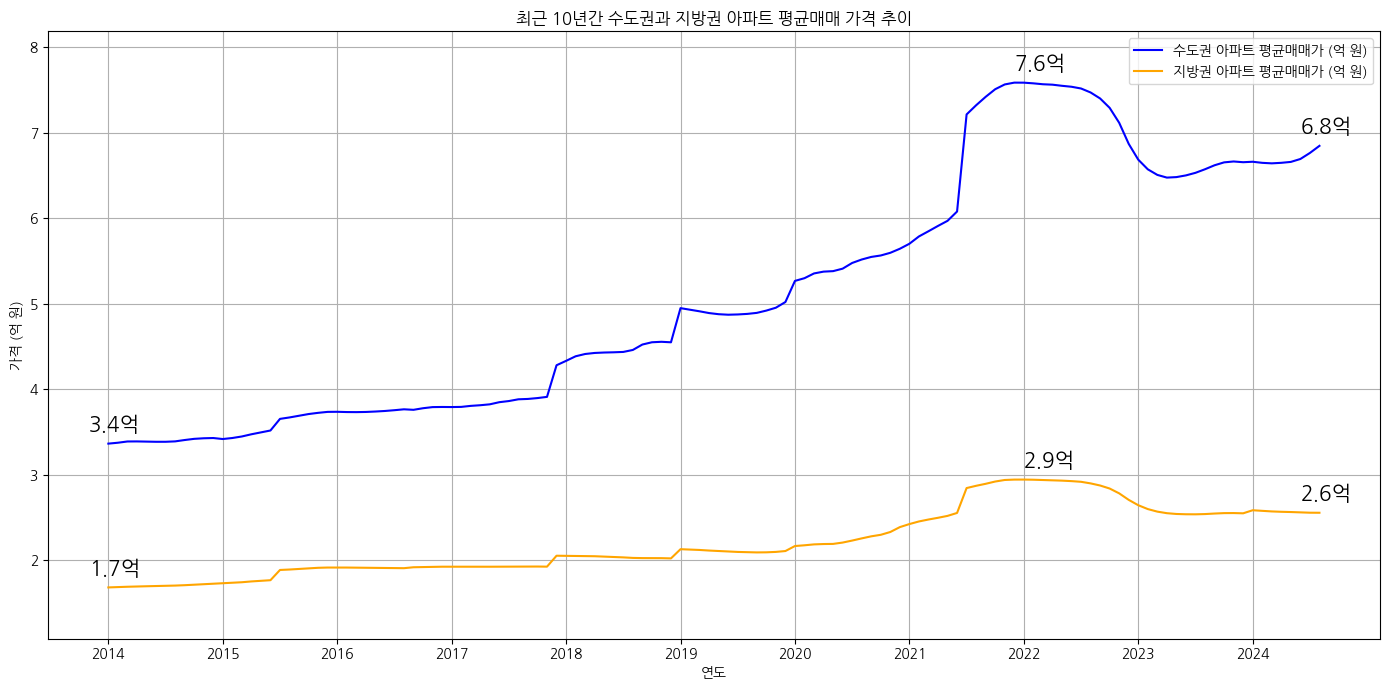

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# X축은 모든 PRICE의 인덱스 생성
x_capital = np.arange(len(capital_prices))  # 0부터 127까지
x_non_capital = np.arange(len(non_capital_prices))  # 0부터 127까지

# 그래프 설정
plt.figure(figsize=(14, 7))

# 수도권 PRICE 그래프 추가
plt.plot(x_capital, capital_prices, label='수도권 아파트 평균매매가 (억 원)', color='blue')

# 지방권 PRICE 그래프 추가
plt.plot(x_non_capital, non_capital_prices, label='지방권 아파트 평균매매가 (억 원)', color='orange')

# X축 레이블 설정 (연도)
plt.xticks(ticks=np.arange(0, 128, 12), labels=capital_df['YEAR'].unique())  # 각 연도에 맞춰 설정

# 그래프 레이블 및 제목 설정
plt.title('최근 10년간 수도권과 지방권 아파트 평균매매 가격 추이')
plt.xlabel('연도')
plt.ylabel('가격 (억 원)')

# y축 범위 설정 (상하 여유 추가)
plt.ylim([min(min(capital_prices), min(non_capital_prices)) - 0.6, 
           max(max(capital_prices), max(non_capital_prices)) + 0.6])
plt.legend()
plt.grid()

# 텍스트 추가: 처음 값, 마지막 값 표시
# 수도권 그래프의 처음과 마지막 값
plt.text(-2, capital_prices.iloc[0] + 0.1, f'{capital_prices.iloc[0]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')
plt.text(len(capital_prices) - 3, capital_prices.iloc[-1] + 0.1, f'{capital_prices.iloc[-1]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 지방권 그래프의 처음과 마지막 값
plt.text(-2, non_capital_prices.iloc[0] + 0.1, f'{non_capital_prices.iloc[0]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')
plt.text(len(non_capital_prices) - 3, non_capital_prices.iloc[-1] + 0.1, f'{non_capital_prices.iloc[-1]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 수도권 그래프의 최대값 위치에 텍스트 추가
max_capital_index = np.argmax(capital_prices)
plt.text(max_capital_index, capital_prices.iloc[max_capital_index] + 0.1, 
         f'{capital_prices.iloc[max_capital_index]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 지방권 그래프의 최대값 위치에 텍스트 추가
max_non_capital_index = np.argmax(non_capital_prices)
plt.text(max_non_capital_index, non_capital_prices.iloc[max_non_capital_index] + 0.1, 
         f'{non_capital_prices.iloc[max_non_capital_index]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 그래프 표시
plt.tight_layout()
plt.show()


### 히스토 그램으로 나타내기

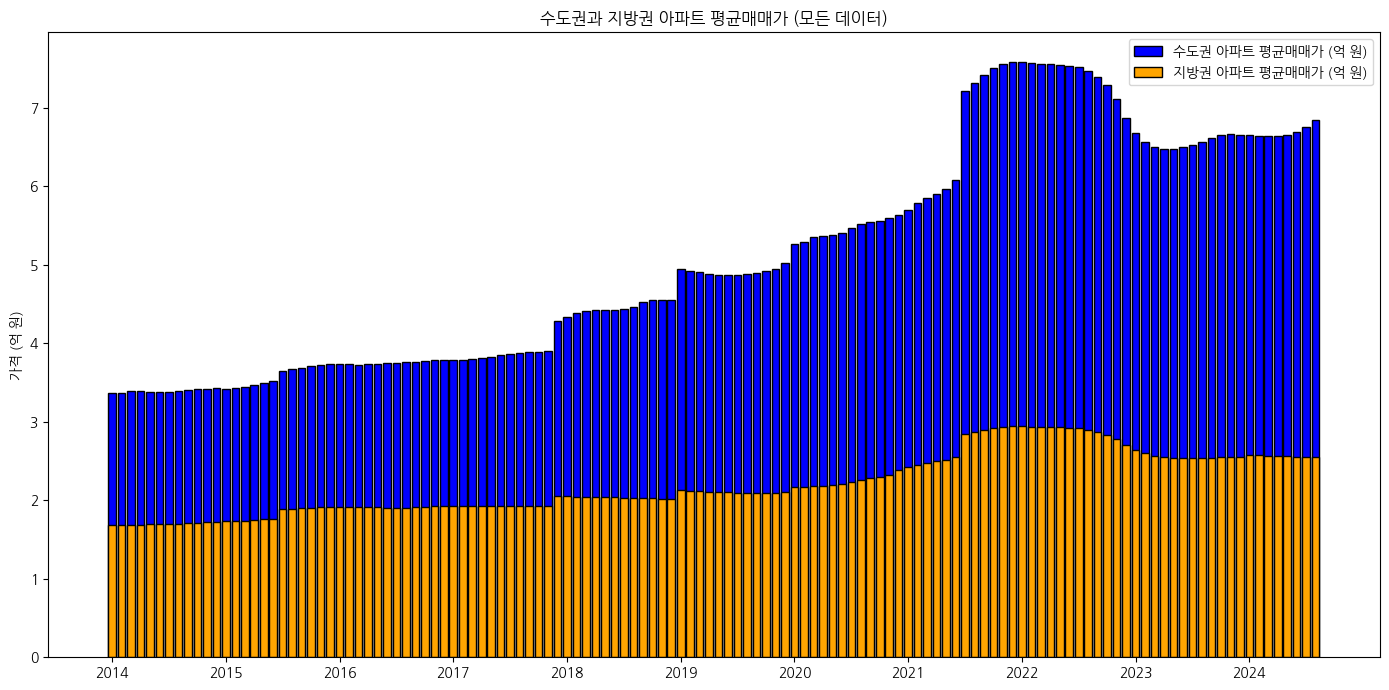

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# X축 인덱스 생성 (0부터 127까지)
x_indices = np.arange(len(capital_prices))

# 그래프 설정
plt.figure(figsize=(14, 7))

# 수도권 아파트 평균매매가 바 차트 추가
plt.bar(x_indices, capital_prices, label='수도권 아파트 평균매매가 (억 원)', color='blue', edgecolor='black')

# 지방권 아파트 평균매매가 바 차트 추가 (각 바를 일정 간격 띄워서 그리기 위해)
plt.bar(x_indices, non_capital_prices, label='지방권 아파트 평균매매가 (억 원)', color='orange', edgecolor='black')

# X축 레이블 설정 (연도)
plt.xticks(ticks=np.arange(0, 128, 12), labels=capital_supply_df['YEAR'].unique(), rotation=0)  # 각 연도에 맞춰 설정

# Y축 레이블 설정
plt.ylabel('가격 (억 원)')

# 그래프 제목 설정
plt.title('수도권과 지방권 아파트 평균매매가 (모든 데이터)')

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()
'''


### 수도권, 지방권 수급 동향 비교하기

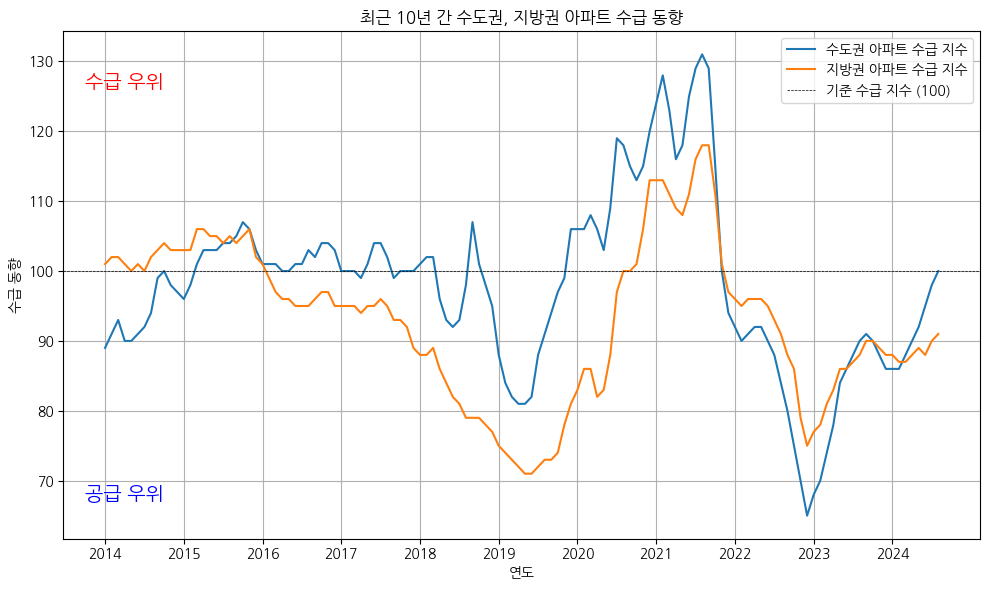

In [37]:
# Create a list of unique year-month pairs for X labels
x_labels = [f"{year}-{month}" for year, month in zip(capital_supply_df['YEAR'], capital_supply_df['MONTH'])]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_labels, capital_supply_df['SUPPLY_INDEX'], label='수도권 아파트 수급 지수')
plt.plot(x_labels, non_capital_supply_df['SUPPLY_INDEX'], label='지방권 아파트 수급 지수')

# X축 레이블 설정 (연도)
plt.xticks(ticks=np.arange(0, 128, 12), labels=capital_supply_df['YEAR'].unique(), rotation=0)  # 각 연도에 맞춰 설정

# Y축 값 100에 수평선 그리기
plt.axhline(y=100, color='black', linestyle='--', linewidth=0.5, label='기준 수급 지수 (100)')

# 라벨 및 제목 설정
plt.xlabel('연도')
plt.ylabel('수급 동향')
plt.title('최근 10년 간 수도권, 지방권 아파트 수급 동향')

# Y축 부근에 '수급 우위'와 '공급 우위' 텍스트 추가
plt.text(-3, 127, '수급 우위', fontsize=14, color='red', verticalalignment='center')
plt.text(-3, 68, '공급 우위', fontsize=14, color='blue', verticalalignment='center')

# 범례 표시 (수평선 포함)
plt.legend()

plt.grid()

plt.tight_layout()
plt.show()


### bar 그래프 + 수급동향 그래프

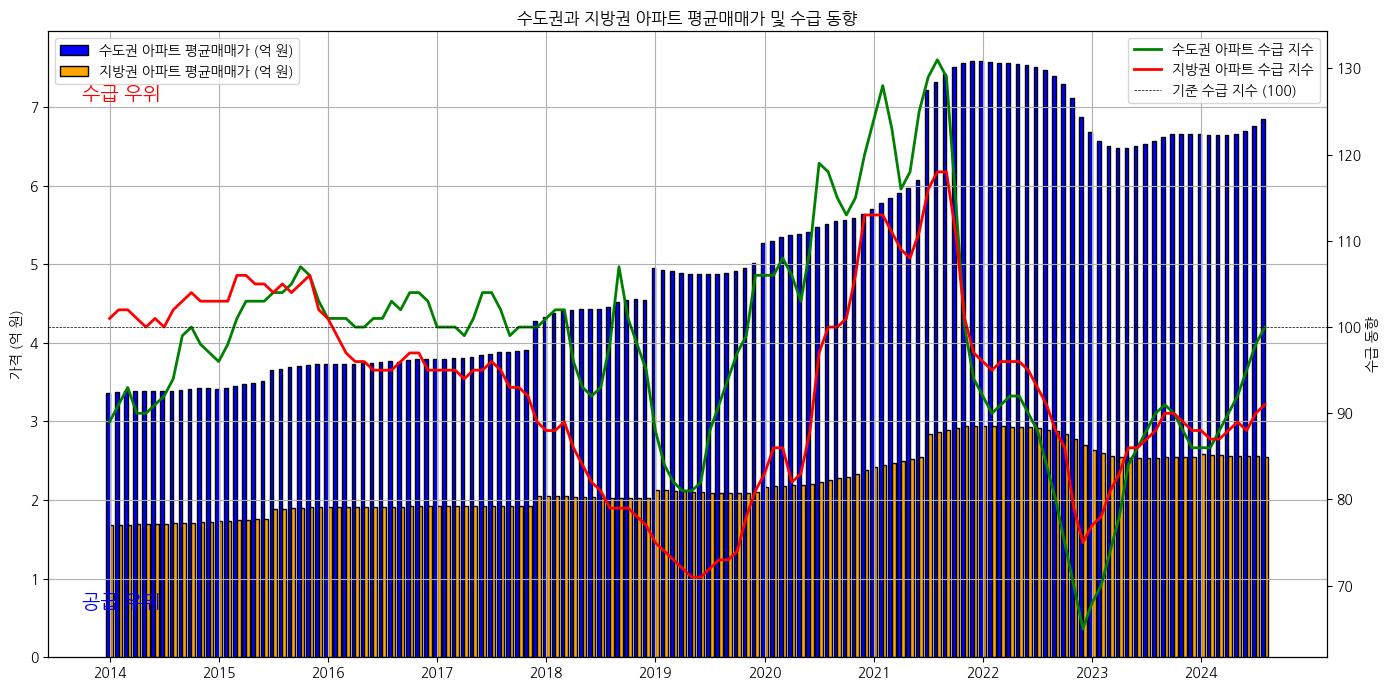

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# X축 인덱스 생성 (0부터 127까지)
x_indices = np.arange(len(capital_prices))

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# 수도권 아파트 평균매매가 바 차트 추가
ax1.bar(x_indices - 0.2, capital_prices, width=0.4, label='수도권 아파트 평균매매가 (억 원)', color='blue', edgecolor='black')
ax1.bar(x_indices + 0.2, non_capital_prices, width=0.4, label='지방권 아파트 평균매매가 (억 원)', color='orange', edgecolor='black')

# X축 레이블 설정 (연도)
ax1.set_xticks(np.arange(0, 128, 12))
ax1.set_xticklabels(capital_supply_df['YEAR'].unique(), rotation=0)

# Y축 레이블 설정
ax1.set_ylabel('가격 (억 원)')
ax1.set_title('수도권과 지방권 아파트 평균매매가 및 수급 동향')

# 두 번째 Y축 설정
ax2 = ax1.twinx()
# 연도-월 레이블 생성
x_labels = [f"{year}-{month:02d}" for year, month in zip(capital_supply_df['YEAR'], capital_supply_df['MONTH'])]

# 수급 지수 그래프 추가
ax2.plot(x_labels, capital_supply_df['SUPPLY_INDEX'], label='수도권 아파트 수급 지수', color='green', linewidth=2)
ax2.plot(x_labels, non_capital_supply_df['SUPPLY_INDEX'], label='지방권 아파트 수급 지수', color='red', linewidth=2)

# Y축 레이블 설정
ax2.set_ylabel('수급 동향')

# Y축 기준선 추가
ax2.axhline(y=100, color='black', linestyle='--', linewidth=0.5, label='기준 수급 지수 (100)')

# Y축 부근에 '수급 우위'와 '공급 우위' 텍스트 추가
ax2.text(-3, 127, '수급 우위', fontsize=14, color='red', verticalalignment='center')
ax2.text(-3, 68, '공급 우위', fontsize=14, color='blue', verticalalignment='center')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그리드 추가
ax1.grid()

# 그래프 표시
plt.tight_layout()
plt.show()'''


## 수도권 지방권 평균 매매가 및 수급 동향

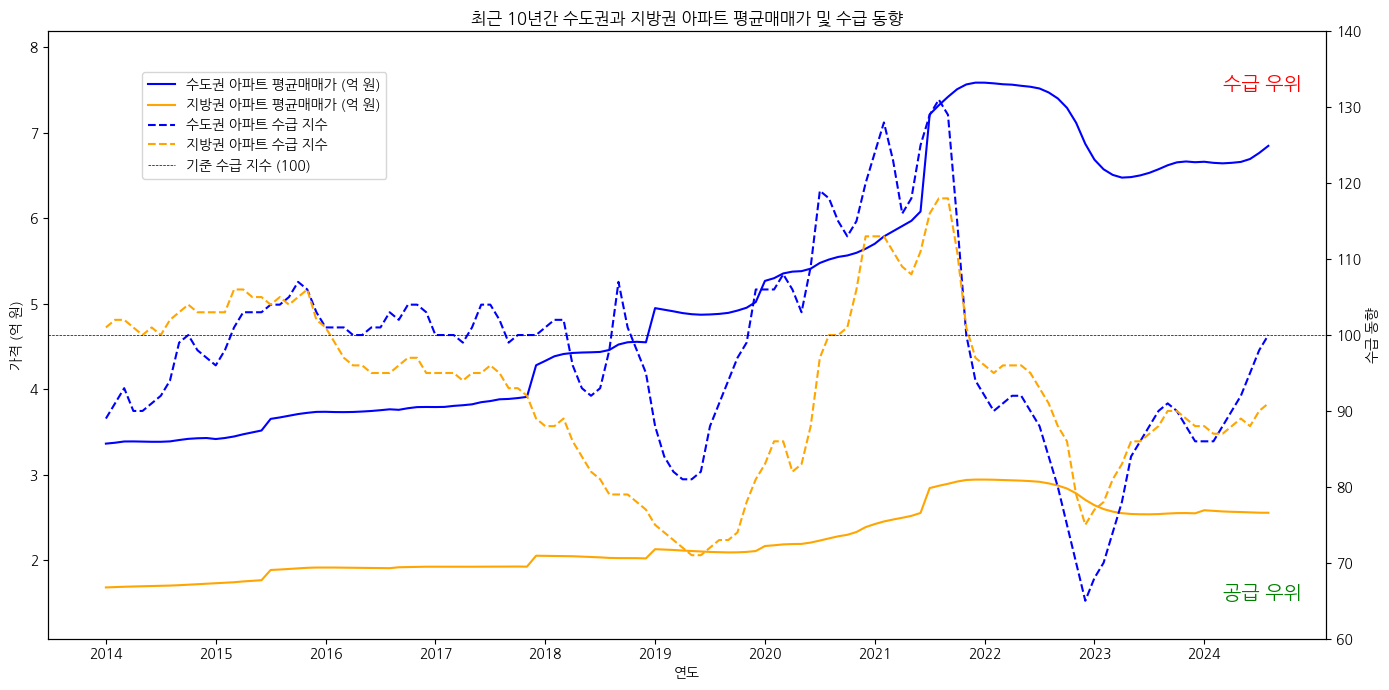

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# X축은 모든 PRICE의 인덱스 생성
x_capital = np.arange(len(capital_prices))  # 0부터 127까지
x_non_capital = np.arange(len(non_capital_prices))  # 0부터 127까지

# 수급 동향용 x_labels
x_labels = [f"{year}-{month}" for year, month in zip(capital_supply_df['YEAR'], capital_supply_df['MONTH'])]

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# 수도권과 지방권 가격 그래프 (첫 번째 Y축)
ax1.plot(x_capital, capital_prices, label='수도권 아파트 평균매매가 (억 원)', color='blue')
ax1.plot(x_non_capital, non_capital_prices, label='지방권 아파트 평균매매가 (억 원)', color='orange')

# X축 레이블 설정 (연도)
ax1.set_xticks(np.arange(0, 128, 12))
ax1.set_xticklabels(capital_df['YEAR'].unique())

# Y축 범위 설정 (가격)
ax1.set_ylim([min(min(capital_prices), min(non_capital_prices)) - 0.6, 
              max(max(capital_prices), max(non_capital_prices)) + 0.6])

# 첫 번째 Y축 레이블
ax1.set_ylabel('가격 (억 원)')
ax1.set_xlabel('연도')

# 두 번째 Y축 생성
ax2 = ax1.twinx()

# 수급 지수 그래프 (두 번째 Y축)
ax2.plot(x_labels, capital_supply_df['SUPPLY_INDEX'], label='수도권 아파트 수급 지수', color='blue', linestyle='--')
ax2.plot(x_labels, non_capital_supply_df['SUPPLY_INDEX'], label='지방권 아파트 수급 지수', color='orange', linestyle='--')

# Y축 범위 설정 (수급 지수)
ax2.set_ylim([60, 140])
ax2.set_ylabel('수급 동향')

# Y축 값 100에 수평선 그리기 (기준 수급 지수)
ax2.axhline(y=100, color='black', linestyle='--', linewidth=0.5, label='기준 수급 지수 (100)')

# Y축 부근에 '수급 우위'와 '공급 우위' 텍스트 추가
ax2.text(122, 133, '수급 우위', fontsize=14, color='red', verticalalignment='center')
ax2.text(122, 66, '공급 우위', fontsize=14, color='green', verticalalignment='center')

# 범례 추가 (두 번째 Y축 포함)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('최근 10년간 수도권과 지방권 아파트 평균매매가 및 수급 동향')
plt.tight_layout()
plt.show()


### 평균 매매가를 히스토그램으로 나타내기

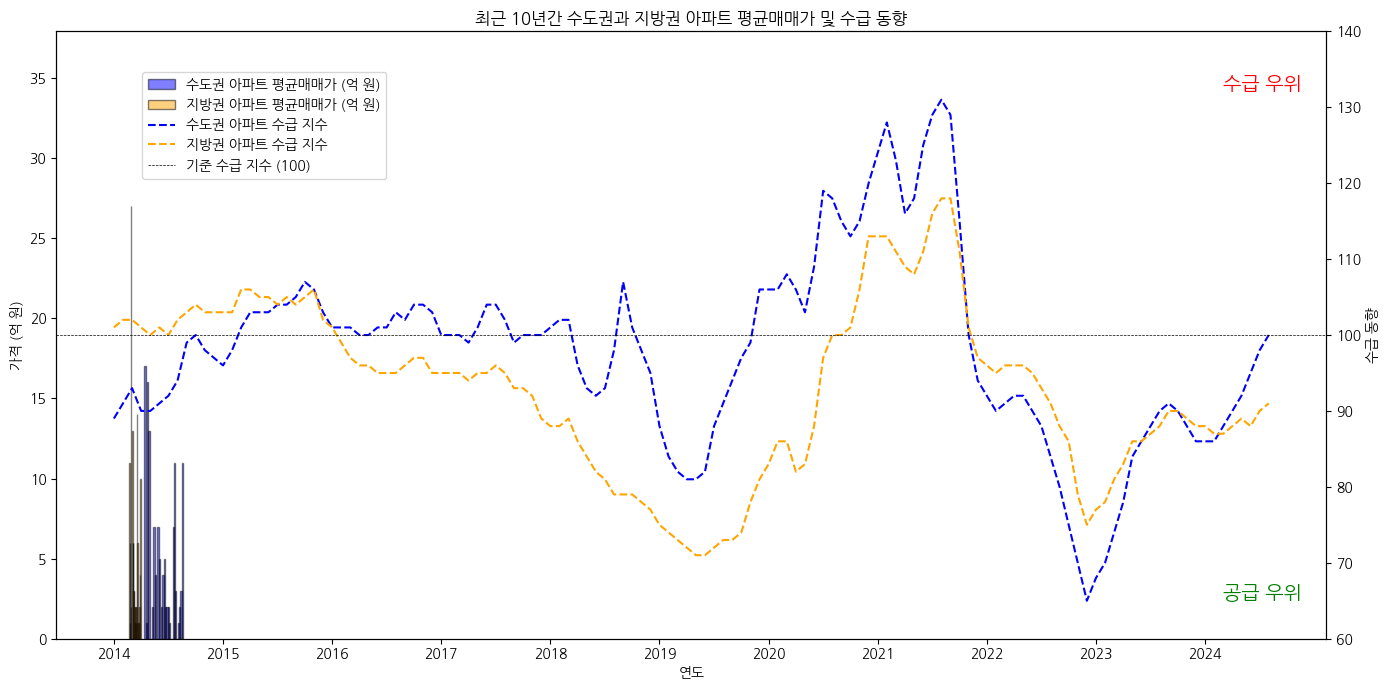

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# 수급 동향용 x_labels
x_labels = [f"{year}-{month}" for year, month in zip(capital_supply_df['YEAR'], capital_supply_df['MONTH'])]

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# 히스토그램: 수도권 아파트 평균매매가 (히스토그램)
ax1.hist(capital_prices, bins=30, alpha=0.5, label='수도권 아파트 평균매매가 (억 원)', color='blue', edgecolor='black')

# 히스토그램: 지방권 아파트 평균매매가 (히스토그램)
ax1.hist(non_capital_prices, bins=30, alpha=0.5, label='지방권 아파트 평균매매가 (억 원)', color='orange', edgecolor='black')

# X축 레이블 설정 (연도)
ax1.set_xticks(np.arange(0, 128, 12))
ax1.set_xticklabels(capital_df['YEAR'].unique())

# Y축 레이블 설정
ax1.set_ylabel('가격 (억 원)')
ax1.set_xlabel('연도')

# Y축 범위 설정 (가격)
ax1.set_ylim([0, max(max(capital_prices), max(non_capital_prices)) * 5])  # 가격의 최대값에 비례하여 설정

# 두 번째 Y축 생성
ax2 = ax1.twinx()

# 수급 지수 그래프 (두 번째 Y축)
ax2.plot(x_labels, capital_supply_df['SUPPLY_INDEX'], label='수도권 아파트 수급 지수', color='blue', linestyle='--')
ax2.plot(x_labels, non_capital_supply_df['SUPPLY_INDEX'], label='지방권 아파트 수급 지수', color='orange', linestyle='--')

# Y축 범위 설정 (수급 지수)
ax2.set_ylim([60, 140])
ax2.set_ylabel('수급 동향')

# Y축 값 100에 수평선 그리기 (기준 수급 지수)
ax2.axhline(y=100, color='black', linestyle='--', linewidth=0.5, label='기준 수급 지수 (100)')

# Y축 부근에 '수급 우위'와 '공급 우위' 텍스트 추가
ax2.text(122, 133, '수급 우위', fontsize=14, color='red', verticalalignment='center')
ax2.text(122, 66, '공급 우위', fontsize=14, color='green', verticalalignment='center')

# 범례 추가 (두 번째 Y축 포함)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('최근 10년간 수도권과 지방권 아파트 평균매매가 및 수급 동향')
plt.tight_layout()
plt.show()
'''

### 따로 분리해서 보여주기

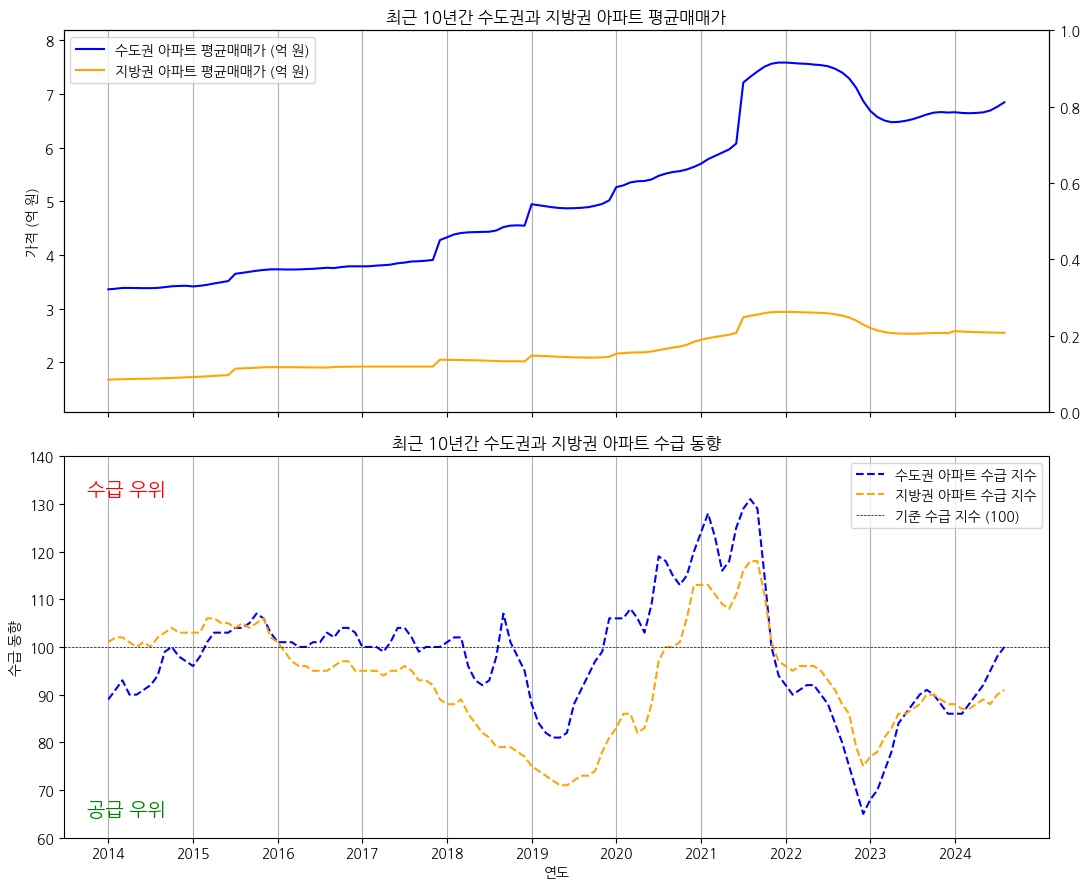

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# X축은 모든 PRICE의 인덱스 생성
x_capital = np.arange(len(capital_prices))  # 0부터 127까지
x_non_capital = np.arange(len(non_capital_prices))  # 0부터 127까지

# 수급 동향용 x_labels
x_labels = [f"{year}-{month}" for year, month in zip(capital_supply_df['YEAR'], capital_supply_df['MONTH'])]

# 그래프 설정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 9), sharex=True)

# 수도권과 지방권 가격 그래프 (첫 번째 subplot)
ax1.plot(x_capital, capital_prices, label='수도권 아파트 평균매매가 (억 원)', color='blue')
ax1.plot(x_non_capital, non_capital_prices, label='지방권 아파트 평균매매가 (억 원)', color='orange')

# Y축 범위 설정 (가격)
ax1.set_ylim([min(min(capital_prices), min(non_capital_prices)) - 0.6, 
              max(max(capital_prices), max(non_capital_prices)) + 0.6])

# 첫 번째 subplot 레이블 및 제목 설정
ax1.set_ylabel('가격 (억 원)')
ax1.set_title('최근 10년간 수도권과 지방권 아파트 평균매매가')

# 두 번째 Y축 생성 (수급 동향)
ax3 = ax1.twinx()  # 두 번째 Y축 추가

# 수급 지수 그래프 (두 번째 subplot)
ax2.plot(x_labels, capital_supply_df['SUPPLY_INDEX'], label='수도권 아파트 수급 지수', color='blue', linestyle='--')
ax2.plot(x_labels, non_capital_supply_df['SUPPLY_INDEX'], label='지방권 아파트 수급 지수', color='orange', linestyle='--')

# Y축 범위 설정 (수급 지수)
ax2.set_ylim([60, 140])
ax2.axhline(y=100, color='black', linestyle='--', linewidth=0.5, label='기준 수급 지수 (100)')

# Y축 부근에 '수급 우위'와 '공급 우위' 텍스트 추가
ax2.text(-3, 133, '수급 우위', fontsize=14, color='red', verticalalignment='center')
ax2.text(-3, 66, '공급 우위', fontsize=14, color='green', verticalalignment='center')

# 두 번째 subplot 레이블 및 제목 설정
ax2.set_ylabel('수급 동향')
ax2.set_xlabel('연도')
ax2.set_title('최근 10년간 수도권과 지방권 아파트 수급 동향')

# X축 레이블 설정 (연도)
ax2.set_xticks(np.arange(0, 128, 12))
ax2.set_xticklabels(capital_df['YEAR'].unique())

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그리드 추가
ax1.xaxis.grid()
ax2.xaxis.grid()

plt.tight_layout()
plt.show()
